# Análisis Exploratorio de Datos (EDA) de los países del mundo.

En primer lugar relizaré un análisis exploratorio de datos de determinados ficheros que contienen información geográfica básica de los países del mundo.
En una segund fase realizare una representación gráfica de los datos analizados.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

Importamos nuestro dataset llamado countries.csv y mostramos los primeros valores de las columnas

In [3]:
df=pd.read_csv('countries.csv',sep=";")
print(df.head(5))

  alpha_2 alpha_3      area           capital continent currency_code  \
0      AD     AND     468.0  Andorra la Vella        EU           EUR   
1      AE     ARE   82880.0         Abu Dhabi        AS           AED   
2      AF     AFG  647500.0             Kabul        AS           AFN   
3      AG     ATG     443.0        St. John's       NaN           XCD   
4      AI     AIA     102.0        The Valley       NaN           XCD   

  currency_name eqivalent_fips_code fips  geoname_id          languages  \
0          Euro                 NaN   AN     3041565                 ca   
1        Dirham                 NaN   AE      290557  ar-AE,fa,en,hi,ur   
2       Afghani                 NaN   AF     1149361  fa-AF,ps,uz-AF,tk   
3        Dollar                 NaN   AC     3576396              en-AG   
4        Dollar                 NaN   AV     3573511              en-AI   

                   name         neighbours  numeric   phone  population  \
0               Andorra            

A continuación vamos a mostrar la cantidad de filas y columnas, y el título de estas últimas.

In [4]:
print("Número de filas y de columnas",df.shape)

Número de filas y de columnas (252, 19)


In [5]:
print("Nombre de las columnas",df.columns)

Nombre de las columnas Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')


A continuación vamos a mostrar la información de estas columnas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

Se observa como en muchas de las columnas existe algún valor nulo de las 252 entradas. Vemos ahora los datos estdísticos más útiles de los datos numéricos.

In [7]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


A continuación vamos a comprobar si exite correlación entre los datos.

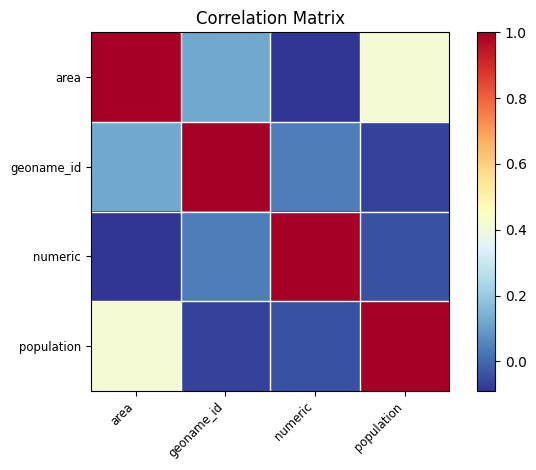

In [8]:
correlacion=df.select_dtypes(include=['number']).corr()
sm.graphics.plot_corr(correlacion,xnames=list(correlacion.columns))
plt.show()

Vamos a cargar un segundo archivo llamado population.csv que recopila el crecimiento de la población en los últimos años para complementar nuestro análisis

In [9]:
df_pop=pd.read_csv('population.csv',sep=",")
print(df_pop.head(5))  

       country  year  population
0  Afghanistan  1952     8425333
1  Afghanistan  1957     9240934
2  Afghanistan  1962    10267083
3  Afghanistan  1967    11537966
4  Afghanistan  1972    13079460


Vamos a proceder a analizar la población de Francia

In [10]:
df_pop_fr=df_pop[df_pop["country"]=="France"]
print(df_pop_fr.head(5))

    country  year  population
528  France  1952    42459667
529  France  1957    44310863
530  France  1962    47124000
531  France  1967    49569000
532  France  1972    51732000


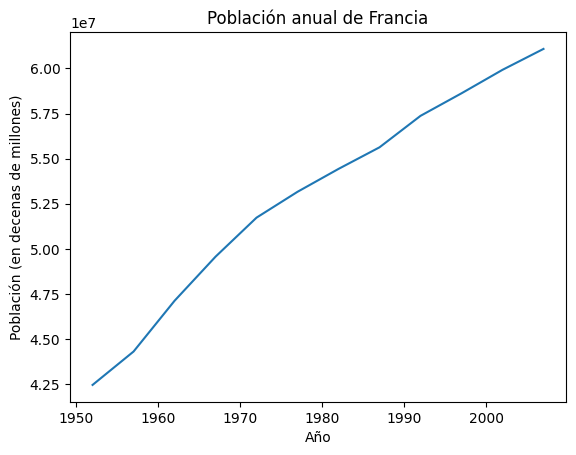

In [11]:
sns.lineplot(x="year",y="population",data=df_pop_fr)
plt.title("Población anual de Francia")
plt.xlabel("Año")
plt.ylabel("Población (en decenas de millones)")

plt.show()


Ahora vamos a realizar el comparativo con la población de Alemania.

<Axes: >

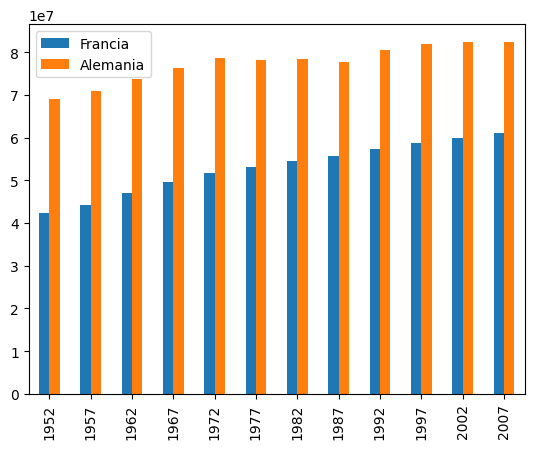

In [14]:
df_pop_gr=df_pop[df_pop["country"]=="Germany"]
anio=df_pop_fr["year"].unique()
pop_fr=df_pop_fr["population"].values
pop_dt=df_pop_gr["population"].values

df_plot=pd.DataFrame({"Francia":pop_fr,"Alemania":pop_dt},index=anio)

df_plot.plot(kind="bar")